In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
help(zip)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
lat_lngs

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
cities

['tsihombe',
 'skelleftea',
 'new norfolk',
 'mar del plata',
 'iqaluit',
 'lazaro cardenas',
 'parkes',
 'rikitea',
 'filingue',
 'hermanus',
 'hasaki',
 'chokurdakh',
 'albany',
 'mataura',
 'bengkulu',
 'kaka',
 'chuy',
 'porto novo',
 'punta arenas',
 'ushuaia',
 'tumannyy',
 'umzimvubu',
 'puerto ayora',
 'port victoria',
 'cherskiy',
 'peachtree city',
 'fairbanks',
 'vrangel',
 'hobart',
 'pevek',
 'provideniya',
 'alyangula',
 'willmar',
 'idrinskoye',
 'vila praia de ancora',
 'kaduna',
 'natal',
 'mikkeli',
 'sao francisco',
 'port macquarie',
 'hilo',
 'kavaratti',
 'bundaberg',
 'kapaa',
 'chernoyerkovskaya',
 'butaritari',
 'hamilton',
 'naze',
 'tautira',
 'barrow',
 'tuktoyaktuk',
 'nyurba',
 'atuona',
 'kimbe',
 'busselton',
 'nouakchott',
 'saint george',
 'avarua',
 'tasiilaq',
 'vestmannaeyjar',
 'sao filipe',
 'bredasdorp',
 'rio gallegos',
 'khatanga',
 'lebu',
 'ilhabela',
 'tiksi',
 'tezu',
 'shakawe',
 'souillac',
 'illoqqortoormiut',
 'carnarvon',
 'yingzhong',

In [8]:
import requests
from config import key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | skelleftea
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | lazaro cardenas
Processing Record 7 of Set 1 | parkes
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | filingue
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | kaka
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | porto novo
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 22 of Set 1 | umzimvubu
City not found. Skipping...
Processing Reco

Processing Record 37 of Set 4 | nome
Processing Record 38 of Set 4 | turukhansk
Processing Record 39 of Set 4 | tripoli
Processing Record 40 of Set 4 | saint anthony
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | kilosa
Processing Record 43 of Set 4 | tapes
Processing Record 44 of Set 4 | cayenne
Processing Record 45 of Set 4 | khandbari
Processing Record 46 of Set 4 | bagontapay
Processing Record 47 of Set 4 | avera
Processing Record 48 of Set 4 | qui nhon
Processing Record 49 of Set 4 | lerwick
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | anna paulowna
Processing Record 2 of Set 5 | kitimat
Processing Record 3 of Set 5 | zonguldak
Processing Record 4 of Set 5 | fecamp
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | iquitos
Processing Record 9 of Set 5 | cholet
Processing Re

Processing Record 28 of Set 8 | amga
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | olenegorsk
Processing Record 31 of Set 8 | yulara
Processing Record 32 of Set 8 | houma
Processing Record 33 of Set 8 | anadyr
Processing Record 34 of Set 8 | lorengau
Processing Record 35 of Set 8 | myitkyina
Processing Record 36 of Set 8 | kaitangata
Processing Record 37 of Set 8 | codrington
Processing Record 38 of Set 8 | ashland
Processing Record 39 of Set 8 | inhambane
Processing Record 40 of Set 8 | hoquiam
Processing Record 41 of Set 8 | bardiyah
Processing Record 42 of Set 8 | sitio novo do tocantins
Processing Record 43 of Set 8 | hovd
Processing Record 44 of Set 8 | wencheng
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 | mazamari
Processing Record 47 of Set 8 | deputatskiy
Processing Record 48 of Set 8 | kermanshah
Processing Record 49 of Set 8 | vysokogornyy
Processing Record 50 of Set 8 | bathsheba
Processing Record 1 of Set 9 | krutinka
Proc

Processing Record 15 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 16 of Set 12 | pitimbu
Processing Record 17 of Set 12 | yialos
City not found. Skipping...
Processing Record 18 of Set 12 | koboldo
City not found. Skipping...
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | bozoum
Processing Record 21 of Set 12 | hobbs
Processing Record 22 of Set 12 | ewa beach
Processing Record 23 of Set 12 | banjar
Processing Record 24 of Set 12 | kuche
City not found. Skipping...
Processing Record 25 of Set 12 | kyra
Processing Record 26 of Set 12 | esmeraldas
Processing Record 27 of Set 12 | wodonga
Processing Record 28 of Set 12 | rosia de secas
Processing Record 29 of Set 12 | ertil
Processing Record 30 of Set 12 | sinnamary
Processing Record 31 of Set 12 | moose factory
Processing Record 32 of Set 12 | barashevo
Processing Record 33 of Set 12 | pangody
Processing Record 34 of Set 12 | lompoc
Processing Record 35 of Set 12 | chabahar
Pr

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Skelleftea,64.7507,20.9528,35.01,69,75,1.01,SE,2021-11-23 19:42:32
1,New Norfolk,-42.7826,147.0587,60.66,74,100,2.10,AU,2021-11-23 19:42:33
2,Mar Del Plata,-38.0023,-57.5575,64.42,83,0,18.99,AR,2021-11-23 19:42:34
3,Iqaluit,63.7506,-68.5145,28.13,68,75,11.01,CA,2021-11-23 19:38:55
4,Lazaro Cardenas,17.9583,-102.2000,83.10,69,11,8.59,MX,2021-11-23 19:42:34
5,Parkes,-33.1333,148.1833,65.35,88,100,1.99,AU,2021-11-23 19:42:35
6,Rikitea,-23.1203,-134.9692,76.66,82,23,15.30,PF,2021-11-23 19:32:47
7,Filingue,14.3521,3.3168,86.77,15,1,6.78,NE,2021-11-23 19:42:35
8,Hermanus,-34.4187,19.2345,64.90,76,100,11.25,ZA,2021-11-23 19:33:56
9,Hasaki,35.7333,140.8333,37.80,62,0,14.41,JP,2021-11-23 19:42:36


In [17]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Skelleftea,SE,2021-11-23 19:42:32,64.7507,20.9528,35.01,69,75,1.01
1,New Norfolk,AU,2021-11-23 19:42:33,-42.7826,147.0587,60.66,74,100,2.10
2,Mar Del Plata,AR,2021-11-23 19:42:34,-38.0023,-57.5575,64.42,83,0,18.99
3,Iqaluit,CA,2021-11-23 19:38:55,63.7506,-68.5145,28.13,68,75,11.01
4,Lazaro Cardenas,MX,2021-11-23 19:42:34,17.9583,-102.2000,83.10,69,11,8.59
5,Parkes,AU,2021-11-23 19:42:35,-33.1333,148.1833,65.35,88,100,1.99
6,Rikitea,PF,2021-11-23 19:32:47,-23.1203,-134.9692,76.66,82,23,15.30
7,Filingue,NE,2021-11-23 19:42:35,14.3521,3.3168,86.77,15,1,6.78
8,Hermanus,ZA,2021-11-23 19:33:56,-34.4187,19.2345,64.90,76,100,11.25
9,Hasaki,JP,2021-11-23 19:42:36,35.7333,140.8333,37.80,62,0,14.41


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

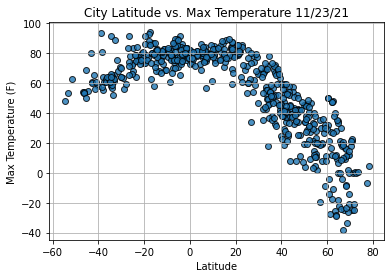

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


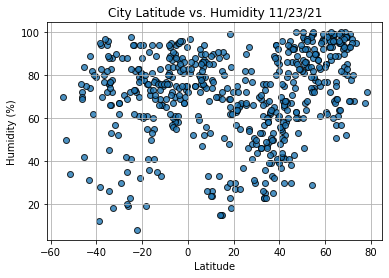

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

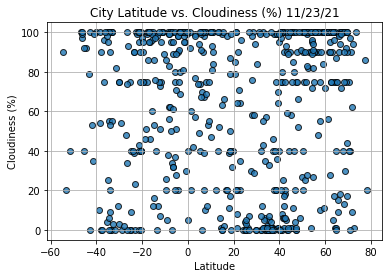

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()
